## Experiment

[14, 15, 15, 15, 15, 14, 15]


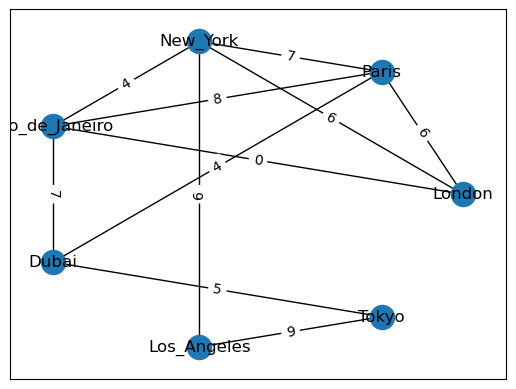

In [1]:
# Using circular layout to see if it helps with interpretation
# Also exploring more exhaustive method to find best options

import networkx as nx
import random
import numpy as np

random.seed(0)

graph = {
    'London': {'Paris': {'population': 2141000, 'lat': 48.8566, 'lon': 2.3522}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'Paris': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'London': {'population': 8982000, 'lat': 51.5074, 'lon': -0.1278}, 'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}},
    'New_York': {'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Dubai': {'Rio_de_Janeiro': {'population': 6748000, 'lat': -22.9068, 'lon': -43.1729}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}},
    'Rio_de_Janeiro': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}},
    'Tokyo': {'Dubai': {'population': 3330000, 'lat': 25.2048, 'lon': 55.2708}, 'Los_Angeles': {'population': 3990000, 'lat': 34.0522, 'lon': -118.2437}},
    'Los_Angeles': {'New_York': {'population': 8399000, 'lat': 40.7128, 'lon': -74.0060}, 'Tokyo': {'population': 13960000, 'lat': 35.6895, 'lon': 139.6917}}
}

# Create network graph
G = nx.Graph()

# Add nodes and edges
for source, destinations in graph.items():
    G.add_node(source)
    for destination, data in destinations.items():
        G.add_node(destination)
        G.add_edge(source, destination, weight=data['population'])

#Computing random weights for this graph
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

#Plotting graphs and weights for reference
labels = nx.get_edge_attributes(G,'weight')
pos=nx.circular_layout(G)
nx.draw_networkx(G,pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=labels)

#Function to find all possible path of size n from node u   
def findPaths(G,u,n):
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor,n-1) if u not in path]
    return paths

#Function to compute the sum of weights for each path in path_list
def sum_weights_path(G,path_list):
  sum_weights=[]
  for i in range(len(path_list)):
    temp=0
    for j in range(len(path_list[i])-1):
      temp+=G.edges[path_list[i][j],path_list[i][j+1]]['weight']
    sum_weights.append(temp)
  return sum_weights

len_path=2
N_nodes=G.number_of_nodes()
paths_list=[[] for i in range(N_nodes)]
weights_paths_list=[[] for i in range(N_nodes)]

#Find max value and index of paths weights max value for each nodes
for node,i in zip(G.nodes,range(N_nodes)):
  temp=findPaths(G,node,len_path)
  paths_list[i].append(temp)
  weights_paths_list[i].append(sum_weights_path(G,temp))

ind_max_val=[]
max_val=[]
#Compute overall max path weights across nodes and return index
for i in range(N_nodes):
  ind_max_val.append(np.argmax(weights_paths_list[i]))
  max_val.append(np.amax(weights_paths_list[i]))


print(max_val)

In [ ]:
# ref:  https://stackoverflow.com/questions/70652048/how-can-i-limit-the-number-of-nodes-when-calculating-node-longest-path